**PROJECT**
# **MELANOMA DETECTION USING DEEP LEARNING TECHNIQUES**
**INTRODUCTION**

Skin disease is one of the most common diseases

Skin cancer is of two types, melanoma (malignant) and
non-melanoma (benign)

Melanoma is a deadly form of skin cancer, but survival rates are high
if detected and diagnosed early

**SCOPE**:
Assist physicians for early melanoma detection

**OBJECTIVE**:
Develop an efficient algorithm for improving the accuracy of melanoma
classification using dermoscopic images

**DATASET**: The dataset for this project is HAM10000

Images with JPG format (600x450px) and metadata file

Benign images: 6705

Malignant images: 1113

**BLOCK DIAGRAM**
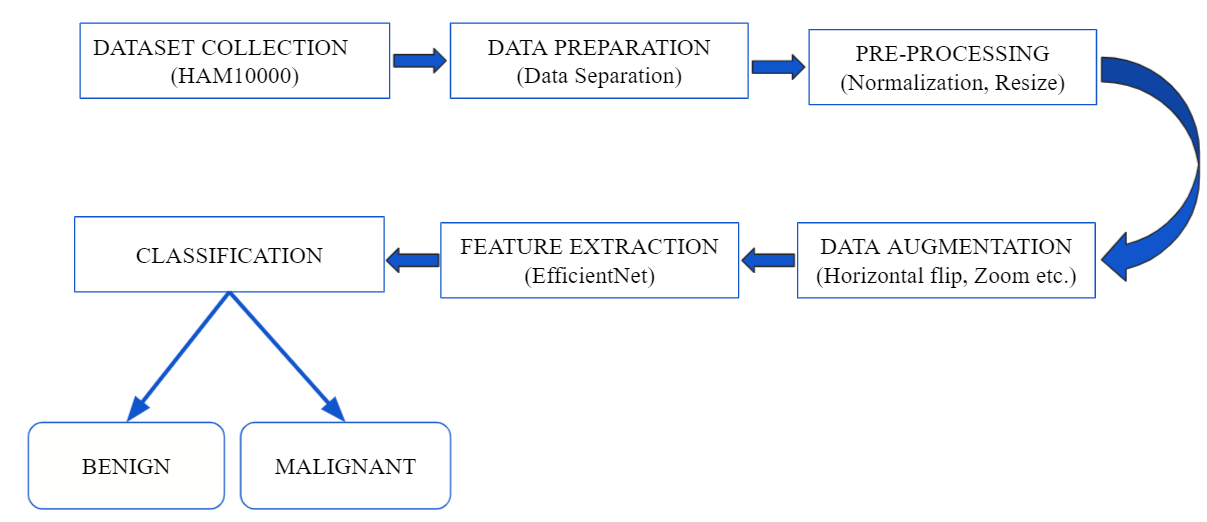


# New Section

In [ ]:
#import pictures from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import some necessary Modules
import os
import cv2
import keras
import numpy as np
import pandas as pd
import random as rn
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#loading pictures
def Dataset_loader(DIR,RESIZE):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
            img = cv2.resize(img, (RESIZE,RESIZE))
            img = img.astype("float32")
            IMG.append(np.array(img)/255.)
    return IMG

benign_train = np.array(Dataset_loader('/content/drive/MyDrive/project/HAM NEW BENIGN/HAM NEW BENIGN',128))
malign_train = np.array(Dataset_loader('/content/drive/MyDrive/project/HAM Malignant/HAM Malignant',128))

100%|██████████| 1113/1113 [00:30<00:00, 36.12it/s] 


In [ ]:
# Create labels
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))


In [ ]:
# Merge data
X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)


In [ ]:
# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

In [ ]:
# Split validation and test data from train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((6336, 128, 128, 3), (705, 128, 128, 3), (783, 128, 128, 3))

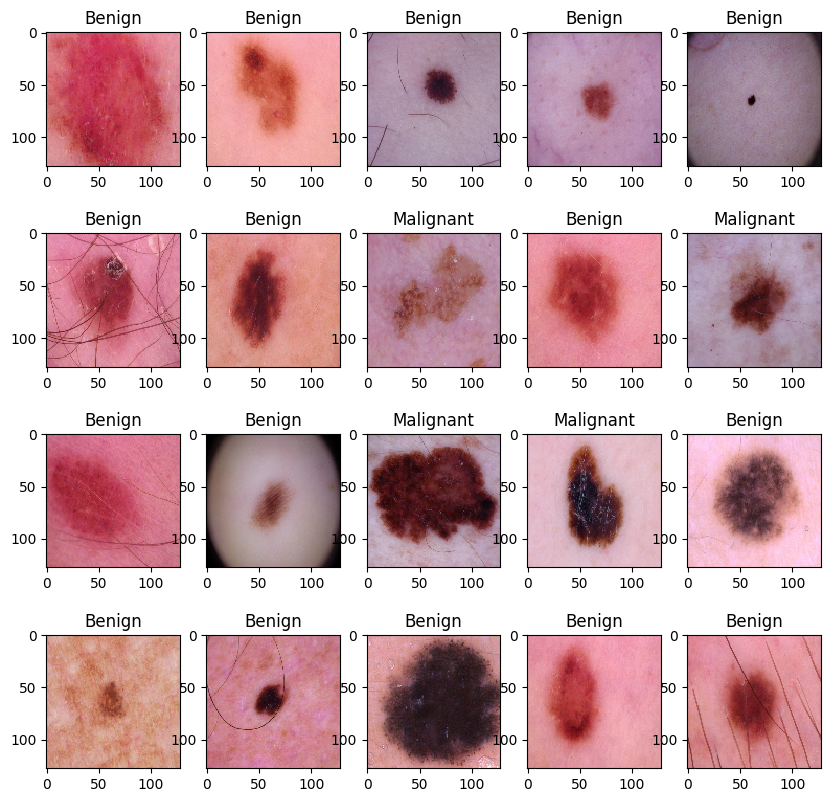

In [ ]:
# Display first 20 images of moles

fig=plt.figure(figsize=(10, 10))

for i in range(1, 20 +1):
    ax = fig.add_subplot(4, 5, i)
    if Y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:
# one hot encoding
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)
y_val = to_categorical(y_val, num_classes= 2)

In [ ]:
# normalization
x_train = x_train/255.
x_test = x_test/255.
x_val = x_val/255.

In [ ]:
# data augmentation

import numpy as np

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [ ]:
# data augmentation

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        preprocessing_function=get_random_eraser(p=0.5, v_h=0, s_h=0.25))

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming we have our training data and labels loaded as x_train and y_train
# Flatten the training data if it's in the form of images or a multi-dimensional array
x_train_flatten = x_train.reshape(x_train.shape[0], -1)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_flatten, y_train)

# Now we can use this trained model for predictions


RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming we have our training and testing data and labels loaded as x_train, x_test, y_train, and y_test

# Flatten the training and testing data if they are in the form of images or multi-dimensional arrays
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_flatten, y_train)

# Make predictions on the testing data
rf_predictions = rf_model.predict(x_test_flatten)



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train and evaluate the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_flatten, y_train)
rf_predictions = rf_model.predict(x_test_flatten)

# Convert y_test and rf_predictions to binary class labels
y_test_binary = np.argmax(y_test, axis=1)
rf_predictions_binary = np.argmax(rf_predictions, axis=1)

# Calculate metrics
rf_accuracy = accuracy_score(y_test_binary, rf_predictions_binary)
rf_f1 = f1_score(y_test_binary, rf_predictions_binary)
rf_report = classification_report(y_test_binary, rf_predictions_binary, target_names=['BENIGN', 'MALIGNANT'])
rf_confusion_matrix = confusion_matrix(y_test_binary, rf_predictions_binary)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Classification Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)


Random Forest Accuracy: 0.8633461047254151
Random Forest F1 Score: 0.3184713375796178
Random Forest Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.87      0.99      0.92       660
   MALIGNANT       0.74      0.20      0.32       123

    accuracy                           0.86       783
   macro avg       0.80      0.59      0.62       783
weighted avg       0.85      0.86      0.83       783

Random Forest Confusion Matrix:
 [[651   9]
 [ 98  25]]


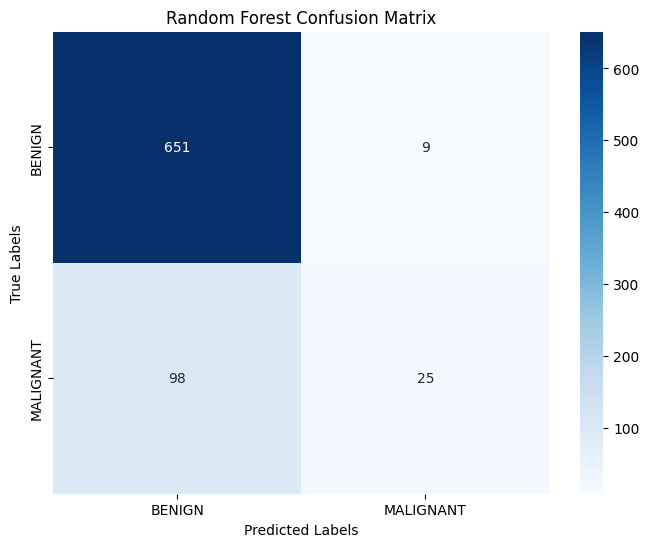

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded predictions to binary format
rf_predictions_binary = np.argmax(rf_predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_binary, rf_predictions_binary)

# Plot the confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'MALIGNANT'], yticklabels=['BENIGN', 'MALIGNANT'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
%tensorflow_version 2.4
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras import optimizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install -U efficientnet
from keras import layers
import tensorflow as tf

import efficientnet.tfkeras as efn

from keras import regularizers
from keras.models import Model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


**SYSTEM ARCHITECTURE**

Pre-trained convolutional neural network EfficientNet, is using for
feature extraction

Transfer the knowledge of pre-trained EfficientNet on ImageNet to
classify images as either malignant or benign class


In [ ]:

eff_net = efn.EfficientNetB6(input_shape=(128, 128, 3), weights='imagenet', include_top=False)

model=Sequential()
model.add(eff_net)
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid'))

alpha = 1e-3  # weight decay coefficient
for layer in model.layers:
    if isinstance(layer, keras.layers.Conv2D) or isinstance(layer, keras.layers.Dense):
        layer.add_loss(lambda: keras.regularizers.l2(alpha)(layer.kernel))
    if hasattr(layer, 'bias_regularizer') and layer.use_bias:
        layer.add_loss(lambda: keras.regularizers.l2(alpha)(layer.bias))

model.summary()

165527152/165527152 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b6 (Functional  (None, 4, 4, 2304)       40960136  
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 2304)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               295040    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                         

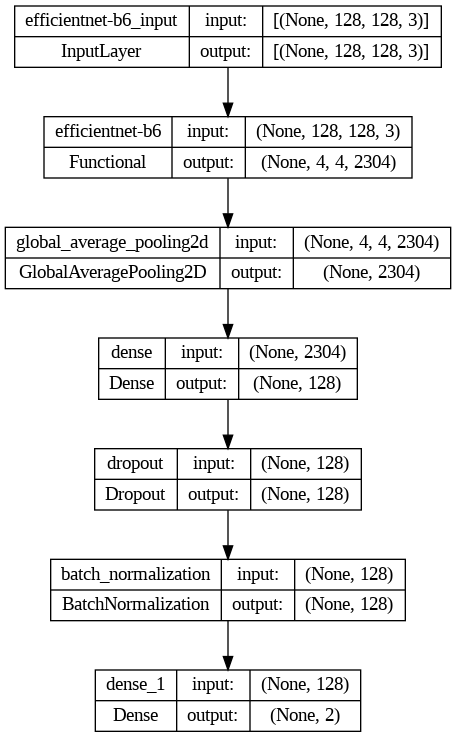

In [ ]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# configure checkpoint data
checkpoint_path = '/content/drive/MyDrive/B6(15).ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose = 1)


In [ ]:
import os

# Delete the existing checkpoint files
checkpoint_path = '/content/drive/MyDrive/B6(15).ckpt'
if os.path.exists(checkpoint_path):
    os.remove(checkpoint_path)
if os.path.exists(checkpoint_path + '.index'):
    os.remove(checkpoint_path + '.index')

# Re-run the training code to create a new checkpoint
# ... (your training code here)


In [ ]:
## prepare model
if (os.path.exists(checkpoint_path + '.index')):
     print('continue training')
     model.load_weights(checkpoint_path)

In [ ]:
# callback - if accuracy doesn't improve after 3 epoch then reduce lr by factor 0.5
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,patience=3, min_lr=0.000005)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor="val_loss", mode="min", patience=5)

In [ ]:
!pip install Adam

In [ ]:
import tensorflow as tf

# Update optimizer definition with learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])


In [ ]:
optimizer=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
h = model.fit(datagen.flow(x_train,y_train, batch_size=32),epochs=5, validation_data=(x_val, y_val),callbacks=[cp_callback, reduce_lr, stop])

Epoch 1/5
198/198 [==============================] - ETA: 0s - loss: 0.4902 - accuracy: 0.8182
Epoch 1: saving model to /content/drive/MyDrive/B6(15).ckpt
198/198 [==============================] - 164s 202ms/step - loss: 0.4902 - accuracy: 0.8182 - val_loss: 0.4879 - val_accuracy: 0.8468 - lr: 0.0010
Epoch 2/5
198/198 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.9023
Epoch 2: saving model to /content/drive/MyDrive/B6(15).ckpt
198/198 [==============================] - 36s 184ms/step - loss: 0.2837 - accuracy: 0.9023 - val_loss: 0.5138 - val_accuracy: 0.8468 - lr: 0.0010
Epoch 3/5
198/198 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9378
Epoch 3: saving model to /content/drive/MyDrive/B6(15).ckpt
198/198 [==============================] - 35s 175ms/step - loss: 0.1852 - accuracy: 0.9378 - val_loss: 0.6841 - val_accuracy: 0.6440 - lr: 0.0010
Epoch 4/5
198/198 [==============================] - ETA: 0s - loss: 0.1477 - accuracy: 0.951

In [ ]:
model.save("/content/drive/MyDrive/mel_disease.h5")

In [ ]:
#By saving the model there will be no need to train the model again and again,
# simply load the model for prediction.
from tensorflow.keras.models import load_model
classifier = load_model("/content/drive/MyDrive/mel_disease.h5")

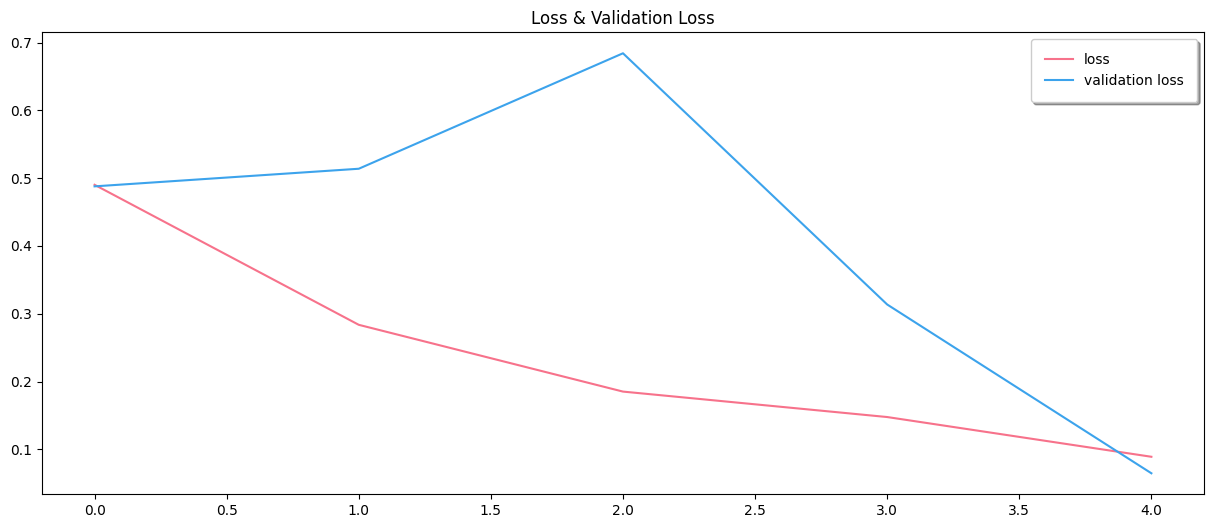

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline



# Assuming `h` is the history object containing training and validation loss values.

# Create a figure with the specified size.
plt.figure(figsize=(15, 6))

# Plot the training loss with a pink line and label it as "loss".
plt.plot(h.history['loss'], color="#F7728B", label='loss')

# Plot the validation loss with a blue line and label it as "validation loss".
plt.plot(h.history['val_loss'], color="#3CA3EC", label='validation loss')

# Add a legend to the plot in the upper right corner with a fancy box, shadow, and border padding.
plt.legend(loc="upper right", fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Set the title of the plot as "Loss & Validation Loss".
plt.title(label="Loss & Validation Loss")


# Display the plot.
plt.show()


Text(0.5, 1.0, 'Loss & Validation Loss')

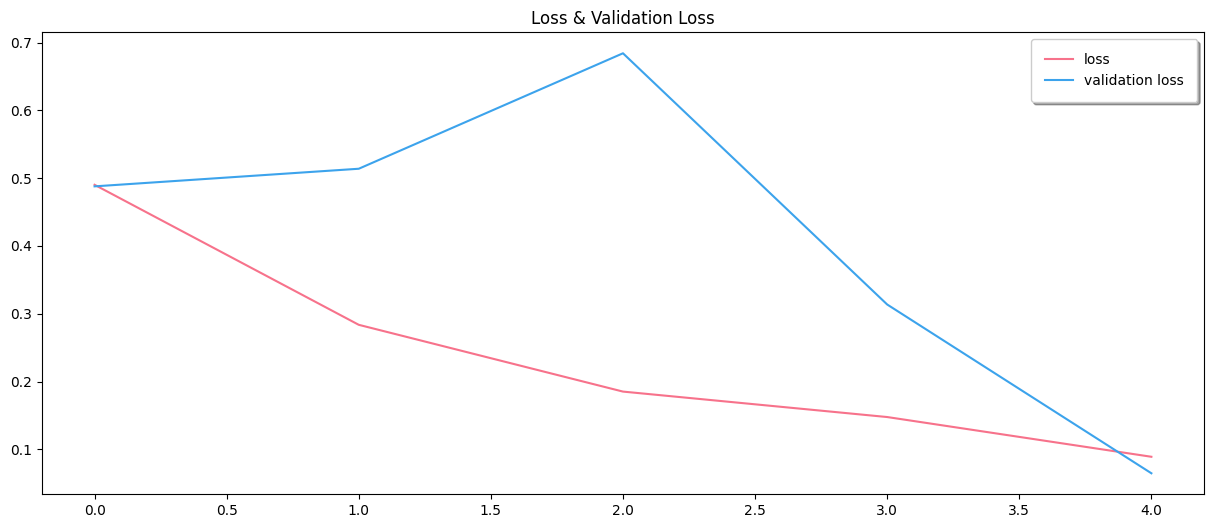

In [ ]:
# loss and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(h.history['loss'],color="#F7728B", label='loss')
plt.plot(h.history['val_loss'], color="#3CA3EC", label='validation loss')
plt.legend(loc="upper right",fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title(label="Loss & Validation Loss")

Text(0.5, 1.0, 'Accuracy & Validation Accuracy')

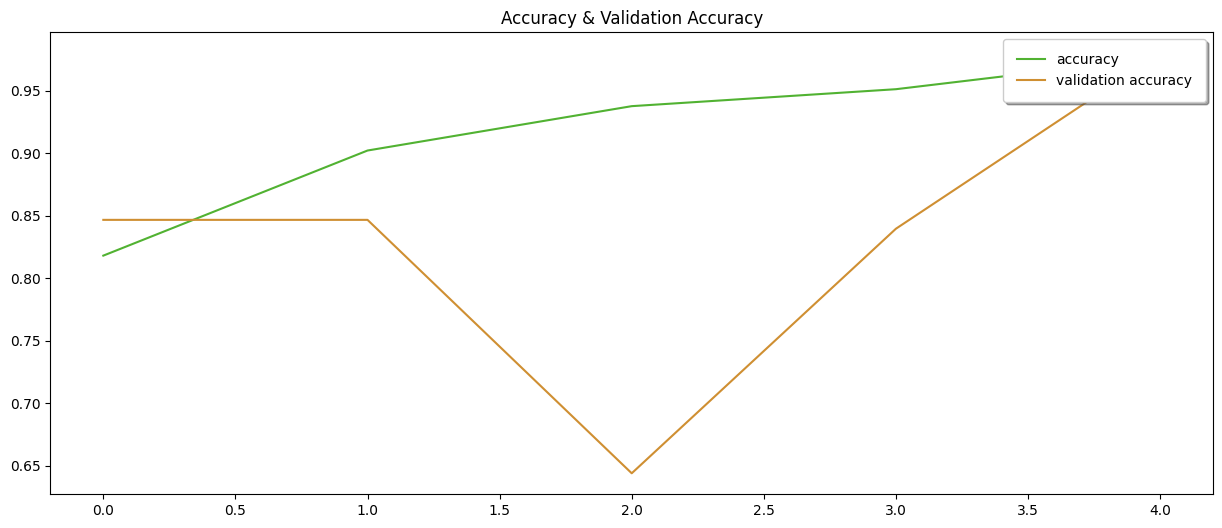

In [ ]:
# accuracy and validation accuracy
plt.figure(figsize=(15,6))
plt.plot(h.history['accuracy'],color="#51B232", label='accuracy')
plt.plot(h.history['val_accuracy'], color="#CF8F32", label='validation accuracy')
plt.legend(loc="upper right",fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title(label="Accuracy & Validation Accuracy")

In [ ]:
print("Train :",model.evaluate(datagen.flow(x_train,y_train, batch_size=32)))
print("Validation :",model.evaluate(x_val,y_val, batch_size=32))
print("Test :",model.evaluate(x_test, y_test, batch_size=32))

198/198 [==============================] - 27s 116ms/step - loss: 0.1470 - accuracy: 0.9336
Train : [0.14703838527202606, 0.9335542917251587]
23/23 [==============================] - 1s 41ms/step - loss: 0.0647 - accuracy: 0.9801
Validation : [0.06473700702190399, 0.980141818523407]
25/25 [==============================] - 1s 57ms/step - loss: 0.0491 - accuracy: 0.9885
Test : [0.04913875088095665, 0.9885057210922241]


In [ ]:
# test the model
y_pred = model.predict(x_test, batch_size=32)
print(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

25/25 [==============================] - 4s 38ms/step
0.9885057471264368


In [ ]:
y_pred[0], y_pred[0][0],y_pred[0][1], y_pred.astype('int')

(array([0.9960064 , 0.00335468], dtype=float32),
 0.9960064,
 0.0033546824,
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]))

In [ ]:
#Confusion Matrix

#pred_results = np.where(y_pred>=0.5, 1,y_pred)
#pred_results2 = np.where(pred_results<0.5, 0,pred_results)
Y_pred =np.argmax(y_pred, axis=-1)
Y_true =np.argmax(y_test, axis=-1)

import sklearn
from sklearn.metrics import confusion_matrix
#cm= sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), pred_results2.argmax(axis=1))
cm= sklearn.metrics.confusion_matrix(Y_true,Y_pred)
print(cm)

[[660   0]
 [  9 114]]


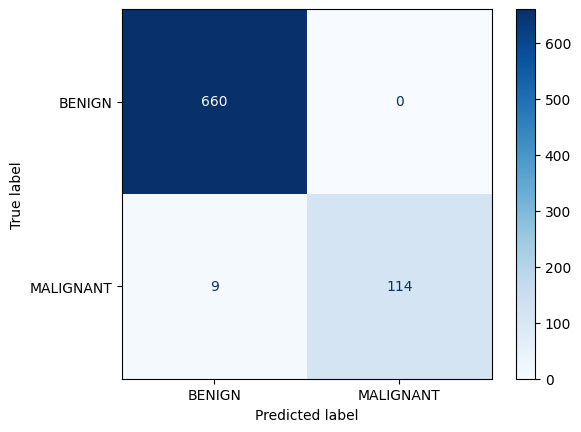

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#sn.heatmap(cm, annot=True, fmt='d',cmap='Blues')
#plt.show()
cmd = ConfusionMatrixDisplay(cm,display_labels=['BENIGN','MALIGNANT'])
cmd.plot(cmap='Blues',values_format='')
plt.show()

True class:HAM Malignant
1/1 [==============================] - 3s 3s/step
Predicted class:BENIGN


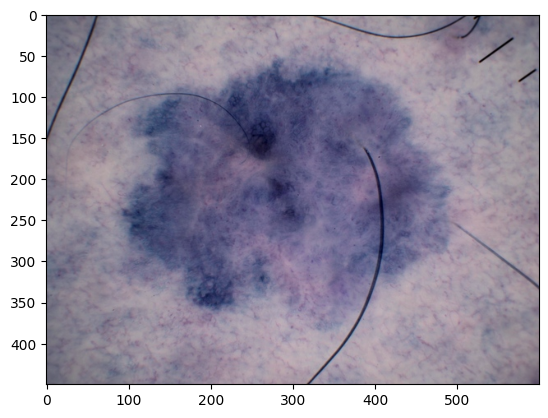

In [ ]:
#prediction of a single test image
testpath ="/content/drive/MyDrive/project/HAM Malignant/HAM Malignant/ISIC_0024333.jpg"
testimg =cv2.imread(testpath)
from matplotlib.pyplot import imshow
plt.imshow(testimg)
testimg =np.expand_dims(cv2.resize(testimg,(128,128)),axis=0)
pathsplit =testpath.split('/')
true_class = pathsplit[6]
print('True class:{}'.format(true_class))

pred = np.argmax(model.predict(testimg),axis=-1)

if pred ==0 :
  print('Predicted class:{}'.format('BENIGN'))
else:
   print('Predicted class:{}'.format('MALIGNANT'))

True class:HAM NEW BENIGN
1/1 [==============================] - 0s 42ms/step
Predicted class:BENIGN


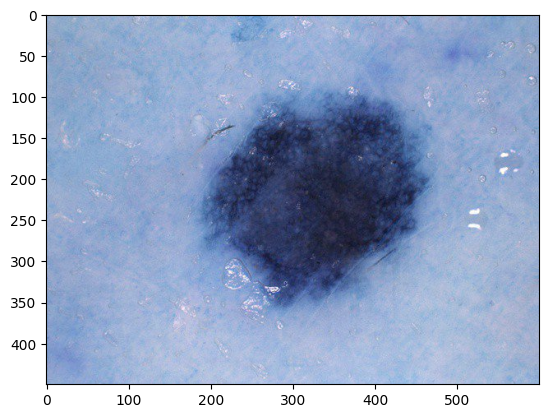

In [ ]:
#prediction of a single test image
testpath ="/content/drive/MyDrive/project/HAM NEW BENIGN/HAM NEW BENIGN/ISIC_0024319.jpg"
testimg =cv2.imread(testpath)
from matplotlib.pyplot import imshow
plt.imshow(testimg)
testimg =np.expand_dims(cv2.resize(testimg,(128,128)),axis=0)
pathsplit =testpath.split('/')
true_class = pathsplit[6]
print('True class:{}'.format(true_class))

pred = np.argmax(model.predict(testimg),axis=-1)

if pred ==0 :
  print('Predicted class:{}'.format('BENIGN'))
else:
   print('Predicted class:{}'.format('MALIGNANT'))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true,Y_pred,target_names=['BENIGN','MALIGNANT']))

              precision    recall  f1-score   support

      BENIGN       0.99      1.00      0.99       660
   MALIGNANT       1.00      0.93      0.96       123

    accuracy                           0.99       783
   macro avg       0.99      0.96      0.98       783
weighted avg       0.99      0.99      0.99       783

